# SIMPLE LINEAR REGRESSION

- Analyze the relationship tip data from seaborn
    - feature: total_bill
    - target: tip
- Apply linear regression
- Perform F-test dan T-test
- Interpret result

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

# linear regression
import statsmodels.api as sm

In [3]:
# load dataset
df_tips = sns.load_dataset('tips')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. Relationship total_bill vs tip

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

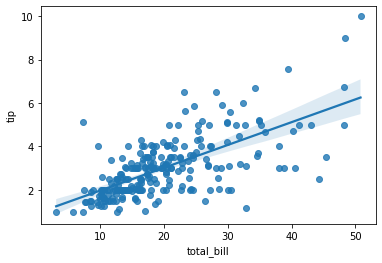

In [4]:
sns.regplot(data=df_tips, x='total_bill', y='tip')

total_bill and tip have linear relationship

## 2. Apply Linear Regression

In [8]:
# define X and y
X = df_tips[['total_bill']]
y = df_tips['tip']

# add intercept/constant
X = sm.add_constant(X)

In [10]:
# create model
model = sm.OLS(y, X)

# fitting (training)
result = model.fit()

In [11]:
# summary of the model
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           6.69e-34
Time:                        10:40:30   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

**Output yang perlu dibaca**

1. R-square (goodness of fit)
2. Prob (F-statistics)          # untuk f-test
3. Prob (P>|t|) dari B0 dan B1  # untuk t-test
4. Coefficient Regression (slope) dari B0 dan B1 

### Interpretasi

**Model**

- y = B0 + B1.x
- y = 0.9203 + 0.105.x


**1. R-square = 0.457**

- R-square = 0.457 artinya model dapat menjelaskan 45.7% variance dari tip. Sisanya 54.3% tidak dapat dijelaskan oleh model.

**2. Prob F-stat = 6.69e-34**

- alpha = 0.05
- Ho: B1 = 0  --> total_bill TIDAK berpengaruh secara signifikan terhadap tip
- Ha: B1 != 0 --> total_bill berpengaruh secara signifikan terhadap tip
<br><br>

- p-value dari F-test adalah 0.000__00669
- p-value < 0.05 ---> reject Ho
- Artinya total_bill berpengaruh secara signifikan terhadap tip

**3. t-test**

- B0 = coeff. const
- B1 = coeff. total_bill

B0. pvalue = 0.000. pvalue < 0.05 --> reject Ho. Artinya intercept dibutuhkan oleh model.

B1. pvalue = 0.000. pvalue < 0.05 --> reject Ho. Artinya total_bill berpengaruh secara signifikan terhadap tip (hubungannya positif -> bisa lihat dari coeef)

**4. Coefficient Regression (slope)**

B0
- y = B0 + B1.X --> y dengan X=0, artinya berapa tip ketika total_bill nya bernilai 0. 
- B0 = 0.9203 artinya ketika total_bill nya bernilai 0, maka tip nya adalah 0.9203 dollar (sebenarnya dalam kasus ini, tidak ada transaksi yang total_billnya 0. Cukup diketahui saja kalau modelnya membutuhkan intercept)

B1
- Setiap kenaikan 1 dollar pada total_bill, maka tip akan naik sebesar 0.105 dollar.
- Setiap kenaikan 10 dollar pada total bill, maka tip akan naik sebesar 1.05 dollar.

# Exercise

- Analyze the relationship in mpg dataset from seaborn
    - feature: horsepower
    - target: mpg
- Apply linear regression
- Perform F-test dan T-test
- Interpret result


In [14]:
df_mpg = sns.load_dataset('mpg')
df_mpg.head() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [15]:
df_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [16]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [17]:
df_mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64